In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.cosmology import Planck15
import os
from tqdm import tqdm
import numpy as np

## Reading in the original samples, both undetected and "good"

In [2]:
og_ul_samp = pd.read_csv("undetected_paul_clusters/all_paul_clusters.csv", header="infer", 
                         dtype={"OBSID": str, "objid": str})
og_ul_samp["invE(z)"] = og_ul_samp["redshift"].apply(lambda x: Planck15.inv_efunc(x))
og_ul_samp["Lx"] = og_ul_samp["Lx"].astype(float) / 10**44
og_ul_samp["objid"] = og_ul_samp["objid"].astype(str)


# This is the "good" sample, spectrally measured Lx values
og_sp_samp = pd.read_csv("paul_good_lx/paul_good_clusters.csv", header="infer", 
                         dtype={"OBSID": str, "objid": str})
og_sp_samp["invE(z)"] = og_sp_samp["redshift"].apply(lambda x: Planck15.inv_efunc(x))

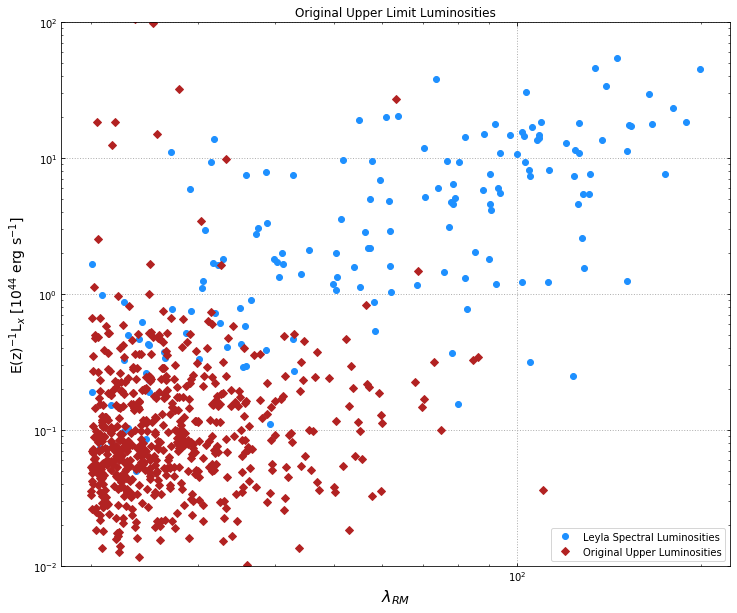

In [3]:
plt.figure(figsize=(12, 10))
ax = plt.gca()

ax.minorticks_on()
ax.tick_params(axis='both', direction='in', which='both', top=True, right=True)
ax.grid(linestyle='dotted', linewidth=1)
ax.axis(option="tight")

ax.set_ylim(0.01, 100)
ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlabel(r"$\lambda_{RM}$", fontsize=16)
ax.set_ylabel(r"E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)
ax.set_title("Original Upper Limit Luminosities")


plt.plot(og_sp_samp["LAMBDA"], og_sp_samp["Lx"]*og_sp_samp["invE(z)"], "o", color="dodgerblue", 
         label="Leyla Spectral Luminosities")
plt.plot(og_ul_samp[og_ul_samp["Lx"] != 0]["LAMBDA"], 
         og_ul_samp[og_ul_samp["Lx"] != 0]["Lx"]*og_ul_samp[og_ul_samp["Lx"] != 0]["invE(z)"], "D", color="firebrick", 
         label="Original Upper Luminosities")

plt.legend(loc="best")
plt.show()

## Reading in the new upper limit Lx values 

# HAVE TO CHANGE THIS PATH BACK FOR THE RESULTS WITH THE NEW REG CODE WHEN THEY'VE RUN

In [4]:
new_ul = pd.read_csv("undetected_paul_clusters/xmm_spectra_sas14_oldregcode/tbabs*apec_lums.csv", header="infer", 
                     dtype={"objid": str, "OBSID": str})
new_ul = new_ul.merge(og_ul_samp, on="objid", suffixes=["", "_x"]).drop("OBSID_x", axis=1)

present = []
for ins in ["PN", "MOS1", "MOS2"]:
    ins_in = [el for el in new_ul.columns.values if ins in el]
    if len(ins_in) != 0:
        print("{n} clusters have a new low "\
              "energy {i} measurement".format(i=ins, n=len(new_ul[new_ul["PN_lowen_ULx"].notna()])))
        present.append(ins)


658 clusters have a new low energy PN measurement


In [5]:
# Shows those rows which didn't have an Lx before
print(new_ul[new_ul["Lx"] == 0].shape[0], "clusters that didn't have upper limits before now have some measurement in one of the cameras")

# Shows those rows which didn't have an Lx before and now have a PN value
print(new_ul[(new_ul["Lx"] == 0) & (new_ul["PN_lowen_ULx"].notna())].shape[0], "clusters that didn't have upper limits before now have some a measurement in PN")

# Shows those rows which did have an Lx before and now don't have a PN value
print(new_ul[(new_ul["Lx"] != 0) & (new_ul["PN_lowen_ULx"].isna())].shape[0], "clusters that did have upper limits before now have no measurement in PN")

87 clusters that didn't have upper limits before now have some measurement in one of the cameras
87 clusters that didn't have upper limits before now have some a measurement in PN
0 clusters that did have upper limits before now have no measurement in PN


## Comparing new upper limits to the original measurements - all original measurements are PN only

/home/dt237/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


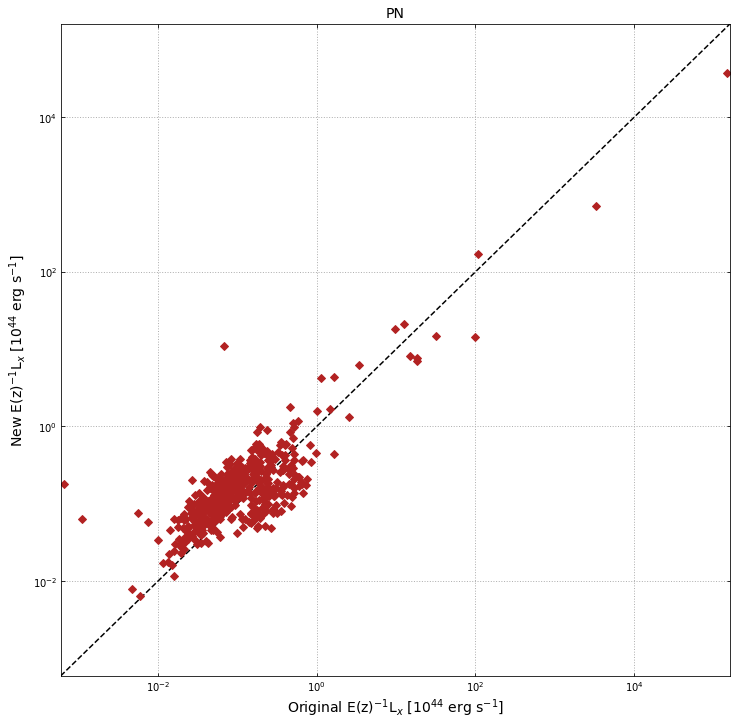

In [6]:
for chosen_inst in ["PN"]: # , "MOS1", "MOS2"]:
    chos = "{}_lowen_ULx".format(chosen_inst)

    el_plotto = new_ul[(new_ul["Lx"] != 0) & (new_ul[chos].notna())]
    el_plotto[chos] = el_plotto[chos].apply(lambda x: x/10**44)
    plt.figure(figsize=(12, 12))
    ax = plt.gca()

    ax.minorticks_on()
    ax.tick_params(axis='both', direction='in', which='both', top=True, right=True)
    ax.grid(linestyle='dotted', linewidth=1)
    ax.axis(option="tight")

    maximum = max([(el_plotto["Lx"]*el_plotto["invE(z)"]).max(), (el_plotto[chos]*el_plotto["invE(z)"]).max()]) * 1.1
    minimum = min([(el_plotto["Lx"]*el_plotto["invE(z)"]).min(), (el_plotto[chos]*el_plotto["invE(z)"]).min()]) * 0.9

    ax.set_title(chosen_inst, fontsize=14)
    ax.plot([minimum, maximum], [minimum, maximum], linestyle="dashed", color="black")
    ax.set_ylim(minimum, maximum)
    ax.set_xlim(minimum, maximum)

    ax.set_yscale("log")
    ax.set_xscale("log")

    ax.set_xlabel(r"Original E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)
    ax.set_ylabel(r"New E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)

    plt.plot(el_plotto["Lx"]*el_plotto["invE(z)"], 
             el_plotto[chos]*el_plotto["invE(z)"], "D", color="firebrick")
    plt.show()

## Showing the new upper limits in context with the Leyla sample

/home/dt237/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


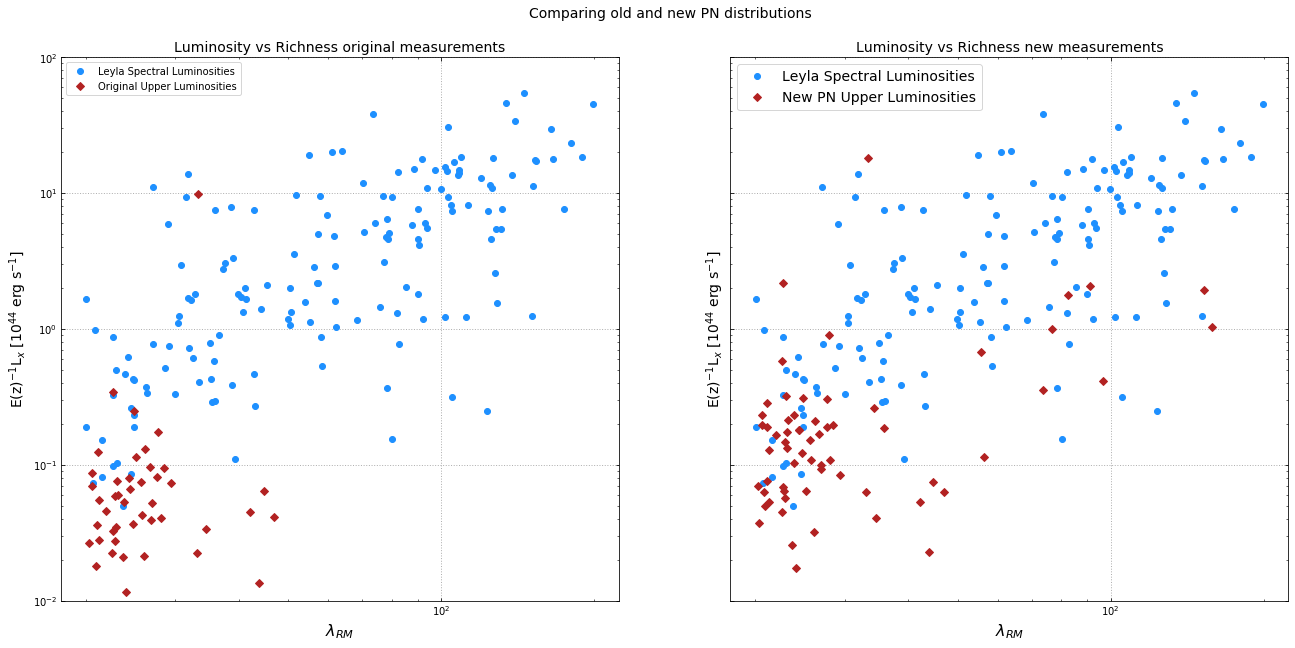

In [7]:
for chosen_inst in ["PN"]: #, "MOS1", "MOS2"]:
    chos = "{}_lowen_ULx".format(chosen_inst)
    el_plotto = new_ul[(new_ul[chos].notna()) & (new_ul["redshift"] < 0.35)]
    el_plotto[chos] = el_plotto[chos].apply(lambda x: x/10**44)
    
    if chosen_inst == "PN":
        comp_fig, ax_arr = plt.subplots(1, 2, figsize=(22, 10), sharey="row")

        for m, subplot in np.ndenumerate(ax_arr):
            subplot.minorticks_on()
            subplot.tick_params(axis='both', direction='in', which='both', top=True, right=True)
            subplot.grid(linestyle='dotted', linewidth=1)
            subplot.axis(option="tight")
            subplot.set_ylim(0.01, 100)
            subplot.set_yscale("log")
            subplot.set_xscale("log")
            subplot.set_xlabel(r"$\lambda_{RM}$", fontsize=16)
            subplot.set_ylabel(r"E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)
        comp_fig.suptitle("Comparing old and new PN distributions", fontsize=14, y=0.95, x=0.51)
        
        ax_arr[0].plot(og_sp_samp["LAMBDA"], og_sp_samp["Lx"]*og_sp_samp["invE(z)"], "o", color="dodgerblue", 
                 label="Leyla Spectral Luminosities")
        ax_arr[0].plot(el_plotto["LAMBDA"], el_plotto["Lx"]*el_plotto["invE(z)"], "D", color="firebrick", 
                 label="Original Upper Luminosities".format(chosen_inst))
        ax_arr[0].legend(loc="best")
        ax_arr[0].set_title("Luminosity vs Richness original measurements", fontsize=14)
        
        ax_arr[1].plot(og_sp_samp["LAMBDA"], og_sp_samp["Lx"]*og_sp_samp["invE(z)"], "o", color="dodgerblue", 
                 label="Leyla Spectral Luminosities")
        ax_arr[1].plot(el_plotto["LAMBDA"], el_plotto[chos]*el_plotto["invE(z)"], "D", color="firebrick", 
                 label="New {} Upper Luminosities".format(chosen_inst))
        ax_arr[1].legend(loc="best", prop={"size": 14})
        ax_arr[1].set_title("Luminosity vs Richness new measurements", fontsize=14)
        

    else:
        plt.figure(figsize=(12, 10))
        ax = plt.gca()

        ax.set_title(chosen_inst, fontsize=14)
        ax.minorticks_on()
        ax.tick_params(axis='both', direction='in', which='both', top=True, right=True)
        ax.grid(linestyle='dotted', linewidth=1)
        ax.axis(option="tight")

        ax.set_ylim(0.01, 100)
        ax.set_yscale("log")
        ax.set_xscale("log")

        ax.set_xlabel(r"$\lambda_{RM}$", fontsize=16)
        ax.set_ylabel(r"E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)


        plt.plot(og_sp_samp["LAMBDA"], og_sp_samp["Lx"]*og_sp_samp["invE(z)"], "o", color="dodgerblue", 
                 label="Leyla Spectral Luminosities")
        plt.plot(el_plotto["LAMBDA"], el_plotto[chos]*el_plotto["invE(z)"], "D", color="firebrick", 
                 label="New {} Upper Luminosities".format(chosen_inst))
        """plt.plot(el_plotto["LAMBDA"], el_plotto["Lx"]*el_plotto["invE(z)"], "D", color="indigo", 
                 label="Old Upper Luminosities".format(chosen_inst))"""

        plt.legend(loc="best")
    plt.show()

## Now to explore Lx values calculated using count rate distribution

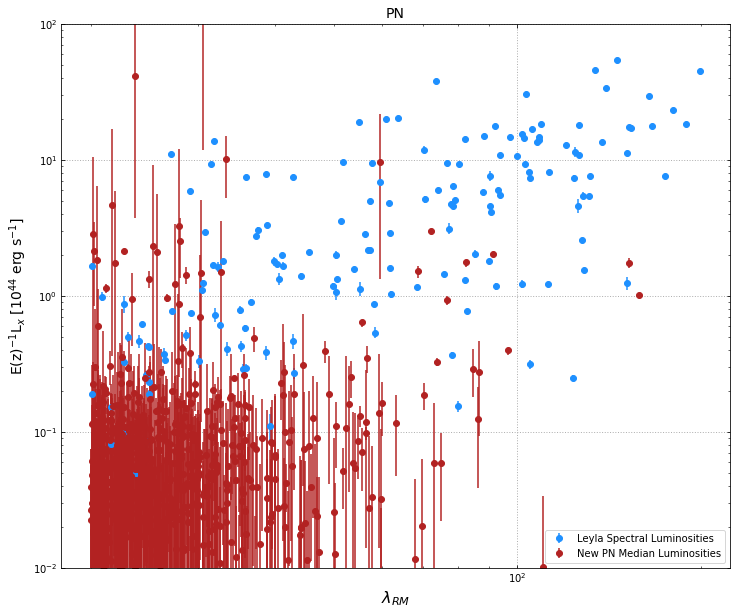

In [8]:
for chosen_inst in ["PN"]: #, "MOS1", "MOS2"]:
    chos = "{}_lowen_MLx".format(chosen_inst)
    
    el_plotto = new_ul[new_ul[chos].notna()]
    el_plotto[chos] = el_plotto[chos].apply(lambda x: x/10**44)
    el_plotto[chos+"-"] = el_plotto[chos+"-"].apply(lambda x: x/10**44)
    el_plotto[chos+"+"] = el_plotto[chos+"+"].apply(lambda x: x/10**44)
    
    plt.figure(figsize=(12, 10))
    ax = plt.gca()

    ax.minorticks_on()
    ax.tick_params(axis='both', direction='in', which='both', top=True, right=True)
    ax.grid(linestyle='dotted', linewidth=1)
    ax.axis(option="tight")
    
    ax.set_title(chosen_inst, fontsize=14)
    ax.set_ylim(0.01, 100)
    ax.set_yscale("log")
    ax.set_xscale("log")

    ax.set_xlabel(r"$\lambda_{RM}$", fontsize=16)
    ax.set_ylabel(r"E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)

    sp_errs = [og_sp_samp["Lx_m"]*og_sp_samp["invE(z)"], og_sp_samp["Lx_m"]*og_sp_samp["invE(z)"]]
    plt.errorbar(og_sp_samp["LAMBDA"], og_sp_samp["Lx"]*og_sp_samp["invE(z)"], yerr=sp_errs, fmt="o", 
                 color="dodgerblue", label="Leyla Spectral Luminosities")

    ml_errs = [el_plotto[chos + "-"]*el_plotto["invE(z)"], el_plotto[chos + "+"]*el_plotto["invE(z)"]]
    plt.errorbar(el_plotto["LAMBDA"], el_plotto[chos]*el_plotto["invE(z)"], yerr=ml_errs, fmt="o", 
                  color="firebrick", label="New {} Median Luminosities".format(chosen_inst))

    plt.legend(loc="best")
    plt.show()

**I agree with Paul** - On the whole it looks like this method just traces the background count-rate. There are a couple of points I'd say were "real" measurements, but we can't pick and choose.

## Also ran the new code on a sample of well detected clusters - with properly measured luminosities

In [9]:
# The clusters from the Leyla sample, previously seen in this notebook as the blue points
good_ul_sample = pd.read_csv("paul_good_lx/xmm_spectra_sas14/tbabs*apec_lums.csv", header="infer", 
                             dtype={"objid": str, "OBSID": str})
# Merge with Leyla sample DF to get quantities like richness
good_ul_sample = good_ul_sample.merge(og_sp_samp, on="objid", suffixes=["", "_x"]).drop("OBSID_x", axis=1)

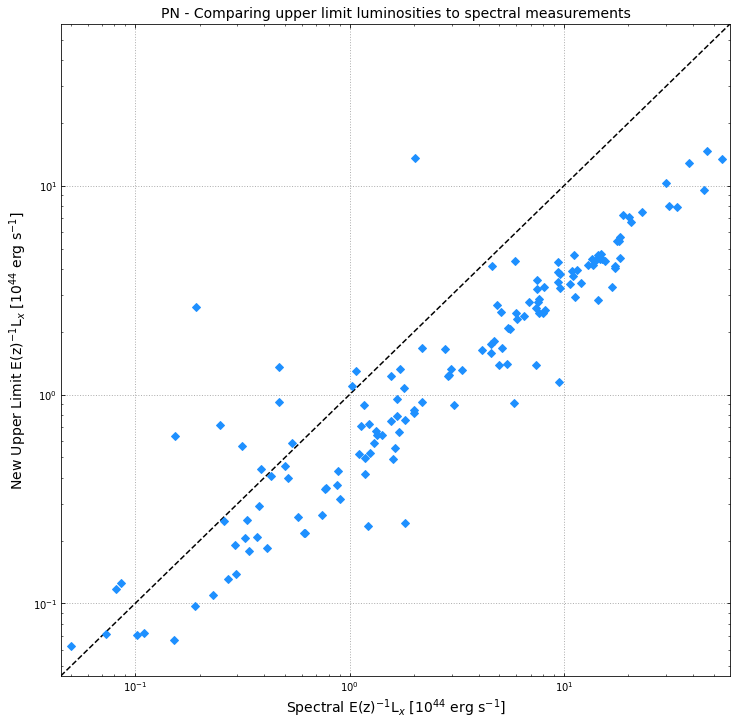

In [10]:
for chosen_inst in ["PN"]: # , "MOS1", "MOS2"]:
    chos = "{}_lowen_ULx".format(chosen_inst)

    el_plotto = good_ul_sample[(good_ul_sample["Lx"] != 0) & (good_ul_sample[chos].notna())]
    el_plotto[chos] = el_plotto[chos].apply(lambda x: x/10**44)
    plt.figure(figsize=(12, 12))
    ax = plt.gca()

    ax.minorticks_on()
    ax.tick_params(axis='both', direction='in', which='both', top=True, right=True)
    ax.grid(linestyle='dotted', linewidth=1)
    ax.axis(option="tight")

    maximum = max([(el_plotto["Lx"]*el_plotto["invE(z)"]).max(), (el_plotto[chos]*el_plotto["invE(z)"]).max()]) * 1.1
    minimum = min([(el_plotto["Lx"]*el_plotto["invE(z)"]).min(), (el_plotto[chos]*el_plotto["invE(z)"]).min()]) * 0.9

    ax.set_title(chosen_inst + " - Comparing upper limit luminosities to spectral measurements", fontsize=14)
    ax.plot([minimum, maximum], [minimum, maximum], linestyle="dashed", color="black")
    ax.set_ylim(minimum, maximum)
    ax.set_xlim(minimum, maximum)

    ax.set_yscale("log")
    ax.set_xscale("log")

    ax.set_xlabel(r"Spectral E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)
    ax.set_ylabel(r"New Upper Limit E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)

    plt.plot(el_plotto["Lx"]*el_plotto["invE(z)"], 
             el_plotto[chos]*el_plotto["invE(z)"], "D", color="dodgerblue")
    plt.show()

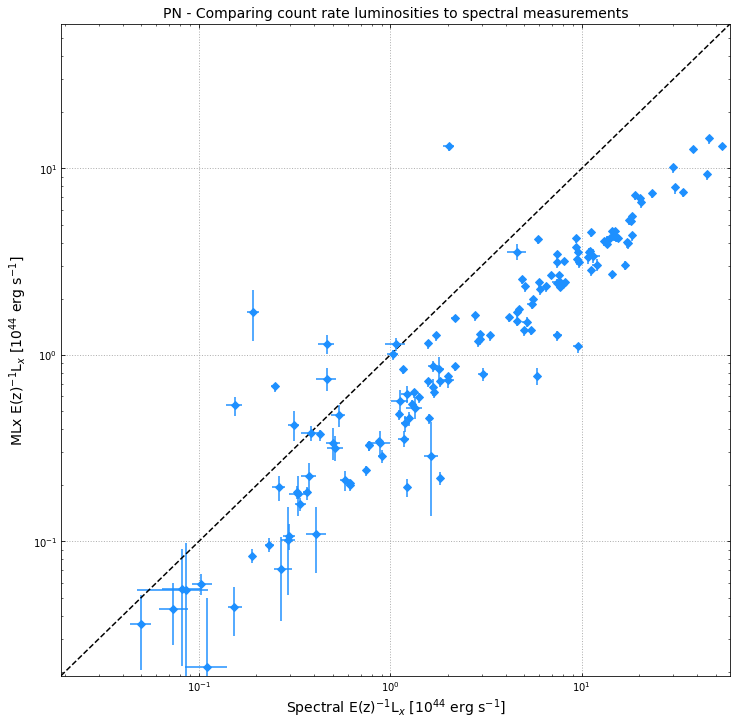

In [11]:
for chosen_inst in ["PN"]: # , "MOS1", "MOS2"]:
    chos = "{}_lowen_MLx".format(chosen_inst)

    el_plotto = good_ul_sample[(good_ul_sample["Lx"] != 0) & (good_ul_sample[chos].notna())]
    el_plotto[chos] = el_plotto[chos].apply(lambda x: x/10**44)
    el_plotto[chos+"-"] = el_plotto[chos+"-"].apply(lambda x: x/10**44)
    el_plotto[chos+"+"] = el_plotto[chos+"+"].apply(lambda x: x/10**44)
    
    
    plt.figure(figsize=(12, 12))
    ax = plt.gca()

    ax.minorticks_on()
    ax.tick_params(axis='both', direction='in', which='both', top=True, right=True)
    ax.grid(linestyle='dotted', linewidth=1)
    ax.axis(option="tight")

    maximum = max([(el_plotto["Lx"]*el_plotto["invE(z)"]).max(), (el_plotto[chos]*el_plotto["invE(z)"]).max()]) * 1.1
    minimum = min([(el_plotto["Lx"]*el_plotto["invE(z)"]).min(), (el_plotto[chos]*el_plotto["invE(z)"]).min()]) * 0.9

    ax.set_title(chosen_inst + " - Comparing count rate luminosities to spectral measurements", fontsize=14)
    ax.plot([minimum, maximum], [minimum, maximum], linestyle="dashed", color="black")
    ax.set_ylim(minimum, maximum)
    ax.set_xlim(minimum, maximum)

    ax.set_yscale("log")
    ax.set_xscale("log")

    ax.set_xlabel(r"Spectral E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)
    ax.set_ylabel(r"MLx E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)
    
    lx_err = [el_plotto["Lx_m"]*el_plotto["invE(z)"], el_plotto["Lx_p"]*el_plotto["invE(z)"]]
    chos_err = [el_plotto[chos+"-"]*el_plotto["invE(z)"], el_plotto[chos+"+"]*el_plotto["invE(z)"]]
    
    plt.errorbar(el_plotto["Lx"]*el_plotto["invE(z)"], el_plotto[chos]*el_plotto["invE(z)"], 
                 xerr=lx_err, yerr=chos_err, fmt="D", color="dodgerblue")
    plt.show()

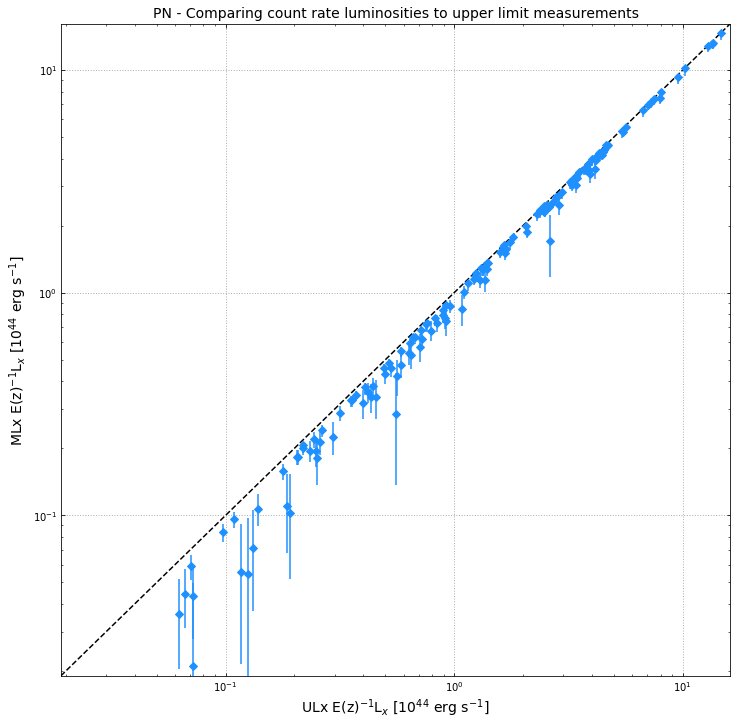

In [12]:
for chosen_inst in ["PN"]: # , "MOS1", "MOS2"]:
    chos = "{}_lowen_MLx".format(chosen_inst)
    chos_ulx = "{}_lowen_ULx".format(chosen_inst)

    el_plotto = good_ul_sample[(good_ul_sample["Lx"] != 0) & (good_ul_sample[chos].notna())]
    el_plotto[chos_ulx] = el_plotto[chos_ulx].apply(lambda x: x/10**44)
    el_plotto[chos] = el_plotto[chos].apply(lambda x: x/10**44)
    el_plotto[chos+"-"] = el_plotto[chos+"-"].apply(lambda x: x/10**44)
    el_plotto[chos+"+"] = el_plotto[chos+"+"].apply(lambda x: x/10**44)
    
    
    plt.figure(figsize=(12, 12))
    ax = plt.gca()

    ax.minorticks_on()
    ax.tick_params(axis='both', direction='in', which='both', top=True, right=True)
    ax.grid(linestyle='dotted', linewidth=1)
    ax.axis(option="tight")

    maximum = max([(el_plotto[chos_ulx]*el_plotto["invE(z)"]).max(), (el_plotto[chos]*el_plotto["invE(z)"]).max()]) * 1.1
    minimum = min([(el_plotto[chos_ulx]*el_plotto["invE(z)"]).min(), (el_plotto[chos]*el_plotto["invE(z)"]).min()]) * 0.9

    ax.set_title(chosen_inst + " - Comparing count rate luminosities to upper limit measurements", fontsize=14)
    ax.plot([minimum, maximum], [minimum, maximum], linestyle="dashed", color="black")
    ax.set_ylim(minimum, maximum)
    ax.set_xlim(minimum, maximum)

    ax.set_yscale("log")
    ax.set_xscale("log")

    ax.set_xlabel(r"ULx E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)
    ax.set_ylabel(r"MLx E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)
    
    chos_err = [el_plotto[chos+"-"]*el_plotto["invE(z)"], el_plotto[chos+"+"]*el_plotto["invE(z)"]]
    plt.errorbar(el_plotto[chos_ulx]*el_plotto["invE(z)"], el_plotto[chos]*el_plotto["invE(z)"], 
                 yerr=chos_err, fmt="D", color="dodgerblue")
    plt.show()

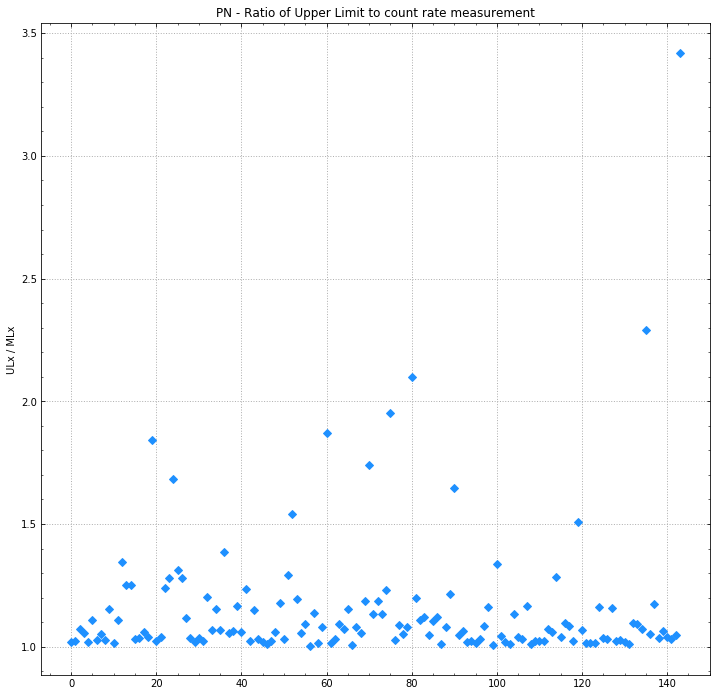

In [13]:
for chosen_inst in ["PN"]: # , "MOS1", "MOS2"]:
    chos = "{}_lowen_MLx".format(chosen_inst)
    chos_ulx = "{}_lowen_ULx".format(chosen_inst)

    el_plotto = good_ul_sample[(good_ul_sample["Lx"] != 0) & (good_ul_sample[chos].notna())]
    el_plotto[chos_ulx] = el_plotto[chos_ulx].apply(lambda x: x/10**44)
    el_plotto[chos] = el_plotto[chos].apply(lambda x: x/10**44)
    
    plt.figure(figsize=(12, 12))
    ax = plt.gca()

    ax.minorticks_on()
    ax.tick_params(axis='both', direction='in', which='both', top=True, right=True)
    ax.grid(linestyle='dotted', linewidth=1)
    ax.axis(option="tight")
    ax.set_ylabel("ULx / MLx")
    ax.set_title("{} - Ratio of Upper Limit to count rate measurement".format(chosen_inst))
    
    plt.plot(el_plotto[chos_ulx]/el_plotto[chos], "D", color="dodgerblue")
    plt.show()

## Did another comparison with good clusters - comparing 'true' and simulated ECFs

In [18]:
good_true_ecfs = pd.read_csv("paul_good_lx/xmm_spectra_sas14/tbabs*apec_true_ECFs.csv", header="infer", 
                             dtype={"objid": str, "OBSID": str})
good_true_ecfs = pd.merge(good_true_ecfs, good_ul_sample, on="objid", suffixes=["_true", ""])

In [34]:
good_true_ecfs

,objid,OBSID_true,PN_lowen_ECF_true,PN_highen_ECF_true,PN_lowen_Lx,PN_lowen_Lx_m,PN_lowen_Lx_p,PN_highen_Lx,PN_highen_Lx_m,PN_highen_Lx_p,...,Lx_m,Lx_p,dec,kT,name,ra,rad,redshift,type,invE(z)
0,124,0652010401,2.026406e-12,7.136473e-12,5.327728e+44,2.702759e+42,2.420644e+42,1.127283e+45,1.059012e+43,1.162561e+43,...,0.251018,0.227627,-6.091818,6.981120,XMMXCSJ000312.1-060530.5,0.800578,301.842030,0.251,ext,0.878412
1,2789,0201900101,2.374206e-12,1.030288e-11,1.211531e+44,6.502914e+41,6.692041e+41,1.917731e+44,3.145510e+42,2.415555e+42,...,0.036829,0.039293,2.068019,4.650760,XMMXCSJ000349.3-020404.8,0.955540,502.540627,0.110,ext,0.947620
2,290,0650380101,1.924148e-12,5.760280e-12,2.314651e+44,4.418299e+42,4.796641e+42,4.557518e+44,1.584984e+43,1.316709e+43,...,0.285697,0.291752,29.161021,4.775560,XMMXCSJ001053.4-290939.6,2.722639,188.446145,0.338,ext,0.835888
3,1018,0403760701,2.218189e-12,6.947714e-12,7.906409e+43,1.224091e+42,1.296265e+42,1.143314e+44,4.626645e+42,4.048460e+42,...,0.058270,0.053893,-0.876192,4.313700,XMMXCSJ001737.5-005234.2,4.406325,258.405768,0.219,ext,0.894162
4,134,0693010301,2.007581e-12,6.754752e-12,4.477813e+44,2.736071e+42,1.893638e+42,9.246267e+44,1.028572e+43,7.819896e+42,...,0.150664,0.188654,3.609818,6.499040,XMMXCSJ001938.0-033635.3,4.908390,269.486958,0.273,ext,0.867606
5,119,0650380401,2.051421e-12,6.248867e-12,1.808030e+44,4.323122e+42,6.539178e+42,3.474768e+44,2.364690e+43,1.792772e+43,...,0.347258,0.329480,-7.862901,4.871130,XMMXCSJ003351.5-075146.4,8.464699,210.891452,0.300,ext,0.854385
6,209,0084230201,2.183809e-12,7.570862e-12,3.979005e+44,2.098446e+42,2.215805e+42,9.291043e+44,1.073576e+43,1.230518e+43,...,0.225540,0.254078,9.157188,8.273190,XMMXCSJ003706.4-090925.8,9.276818,318.300910,0.264,ext,0.872024
7,15,0652460201,3.145143e-12,1.308393e-11,2.893614e+43,6.378054e+41,5.156756e+41,2.493083e+43,1.944672e+42,1.496577e+42,...,0.011995,0.012014,20.467691,3.154650,XMMXCSJ004630.7-202803.6,11.628250,420.571037,0.105,ext,0.950048
8,71,0203220101,2.864346e-12,9.759372e-12,2.356514e+44,1.294485e+42,1.346064e+42,4.543197e+44,5.168277e+42,6.754695e+42,...,0.106851,0.108102,26.330304,5.800590,XMMXCSJ005559.1-261949.0,13.996563,337.399555,0.196,ext,0.905487
9,5020,0784450501,2.459217e-12,9.929724e-12,4.561496e+43,9.478208e+41,2.575245e+42,5.380253e+43,2.773206e+42,5.935650e+42,...,0.075624,0.072001,25.086602,3.982390,XMMXCSJ010414.8-250511.7,16.061785,314.153750,0.167,ext,0.919750


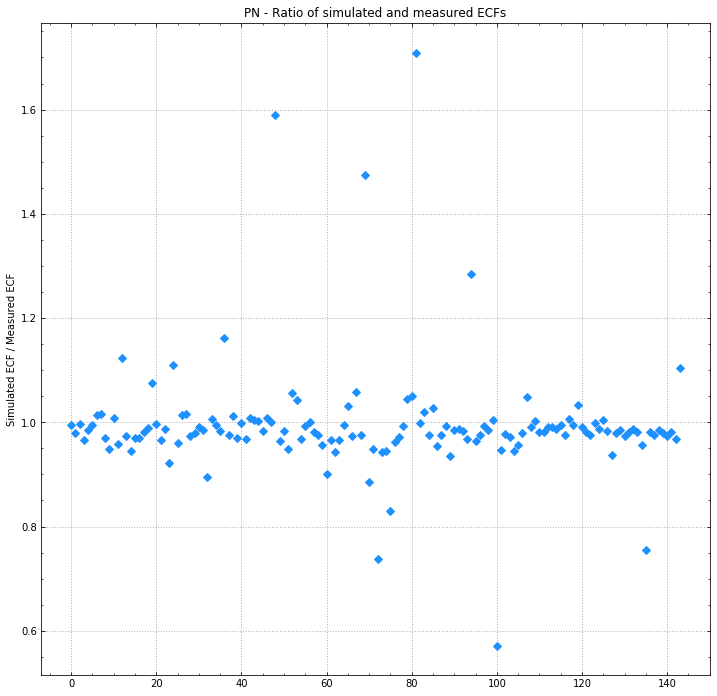

In [20]:
for chosen_inst in ["PN"]: # , "MOS1", "MOS2"]:
    sim_ecf = "{}_lowen_ECF".format(chosen_inst)
    meas_ecf = "{}_lowen_ECF_true".format(chosen_inst)

    el_plotto = good_true_ecfs[good_true_ecfs[meas_ecf].notna()]
    
    plt.figure(figsize=(12, 12))
    ax = plt.gca()

    ax.minorticks_on()
    ax.tick_params(axis='both', direction='in', which='both', top=True, right=True)
    ax.grid(linestyle='dotted', linewidth=1)
    ax.axis(option="tight")
    ax.set_ylabel("Simulated ECF / Measured ECF")
    ax.set_title("{} - Ratio of simulated and measured ECFs".format(chosen_inst))
    
    plt.plot(el_plotto[sim_ecf]/el_plotto[meas_ecf], "D", color="dodgerblue")
    plt.show()

## Comparing upper limits to Lx just from the observation that the UL came from

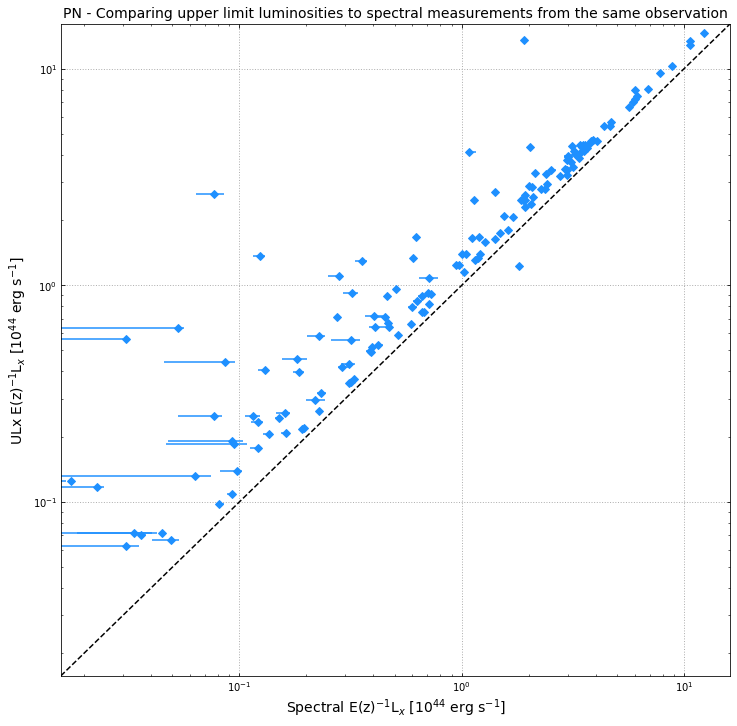

In [35]:
for chosen_inst in ["PN"]: # , "MOS1", "MOS2"]:
    chos = "{}_lowen_ULx".format(chosen_inst)
    chos_spec = "{}_lowen_Lx".format(chosen_inst)
    
    el_plotto = good_true_ecfs[(good_true_ecfs[chos_spec].notna()) & (good_true_ecfs[chos].notna())]
    el_plotto[chos_spec] = el_plotto[chos_spec].apply(lambda x: x/10**44)
    el_plotto[chos_spec+"_m"] = el_plotto[chos_spec+"_m"].apply(lambda x: x/10**44)
    el_plotto[chos_spec+"_p"] = el_plotto[chos_spec+"_p"].apply(lambda x: x/10**44)
    
    el_plotto[chos] = el_plotto[chos].apply(lambda x: x/10**44)

    
    plt.figure(figsize=(12, 12))
    ax = plt.gca()

    ax.minorticks_on()
    ax.tick_params(axis='both', direction='in', which='both', top=True, right=True)
    ax.grid(linestyle='dotted', linewidth=1)
    ax.axis(option="tight")

    maximum = max([(el_plotto[chos_spec]*el_plotto["invE(z)"]).max(), (el_plotto[chos]*el_plotto["invE(z)"]).max()]) * 1.1
    minimum = min([(el_plotto[chos_spec]*el_plotto["invE(z)"]).min(), (el_plotto[chos]*el_plotto["invE(z)"]).min()]) * 0.9

    ax.set_title(chosen_inst + " - Comparing upper limit luminosities to spectral measurements " \
                 "from the same observation", fontsize=14)
    ax.plot([minimum, maximum], [minimum, maximum], linestyle="dashed", color="black")
    ax.set_ylim(minimum, maximum)
    ax.set_xlim(minimum, maximum)

    ax.set_yscale("log")
    ax.set_xscale("log")

    ax.set_xlabel(r"Spectral E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)
    ax.set_ylabel(r"ULx E(z)$^{-1}$L$_{x}$ [$10^{44}$ erg s$^{-1}$]", fontsize=14)
    
    lx_err = [el_plotto[chos_spec+"_m"]*el_plotto["invE(z)"], el_plotto[chos_spec+"_p"]*el_plotto["invE(z)"]]
    
    plt.errorbar(el_plotto[chos_spec]*el_plotto["invE(z)"], el_plotto[chos]*el_plotto["invE(z)"], 
                 xerr=lx_err, fmt="D", color="dodgerblue")
    plt.show()